In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("complete_site_info.xlsx")

In [39]:
df.describe()

,Model_number,Israelis_Count,Tourists_Count,Total,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,is_muslims_vacation,...,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,Eilat_so2,Qiryat Shemona_so2,Safed_so2,region_Central,region_Judea_Samaria,region_North,region_South
count,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,...,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000
mean,3.872732,339.423205,116.113631,455.536835,0.288494,0.031519,0.098022,0.227683,0.033517,0.308144,...,14.943398,4.819869,3.841344,3.269771,2.613034,2.632804,0.126068,0.106683,0.544323,0.222926
std,2.028111,1374.031000,345.011100,1457.485899,0.453064,0.174717,0.297346,0.419339,0.179984,0.461729,...,13.594393,4.103867,1.841737,2.412507,2.246909,2.248942,0.331927,0.308712,0.498034,0.416211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.700000,1.700000,2.500000,2.000000,0.800000,0.800000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,107.000000,3.000000,159.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.500000,3.300000,3.600000,3.100000,2.100000,2.100000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,343.000000,57.000000,458.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,18.800000,7.300000,4.900000,4.000000,3.900000,3.900000,0.000000,0.000000,1.000000,0.000000
max,8.000000,110020.000000,9054.000000,110020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,97.400000,19.800000,18.000000,31.500000,18.300000,18.300000,1.000000,1.000000,1.000000,1.000000


In [6]:
israelis = df.pivot_table(index="Date",values=["Israelis_Count"],aggfunc='sum')
israelis

,Israelis_Count
Date,
2016-01-01,1916
2016-01-02,4794
2016-01-03,2781
2016-01-04,4312
2016-01-05,4865
...,...
2021-08-07,25247
2021-08-08,19171
2021-08-09,24131


In [44]:
israelis[israelis["Israelis_Count"]>=100020]

,Israelis_Count
Date,
2016-04-30,148018
2016-05-31,100426
2016-06-30,129835
2016-07-31,145533
2016-08-31,150787
2016-10-31,108576
2017-05-31,108089
2017-06-30,108171
2017-08-31,122127


In [8]:
tourist = df.pivot_table(index="Date",values=["Tourists_Count"],aggfunc='sum')
tourist

,Tourists_Count
Date,
2016-01-01,3676
2016-01-02,4147
2016-01-03,4941
2016-01-04,6110
2016-01-05,6055
...,...
2021-08-07,169
2021-08-08,204
2021-08-09,85


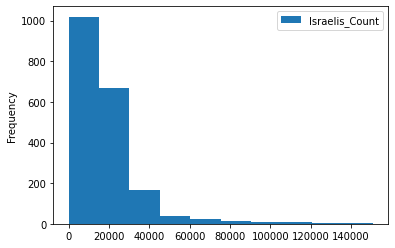

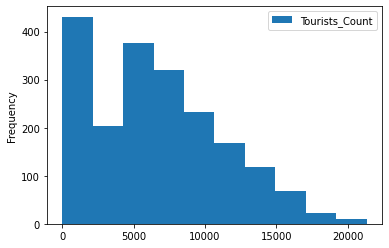

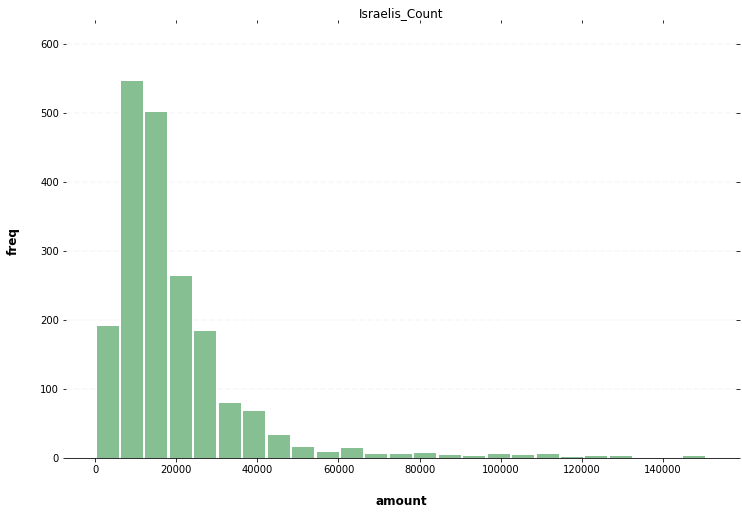

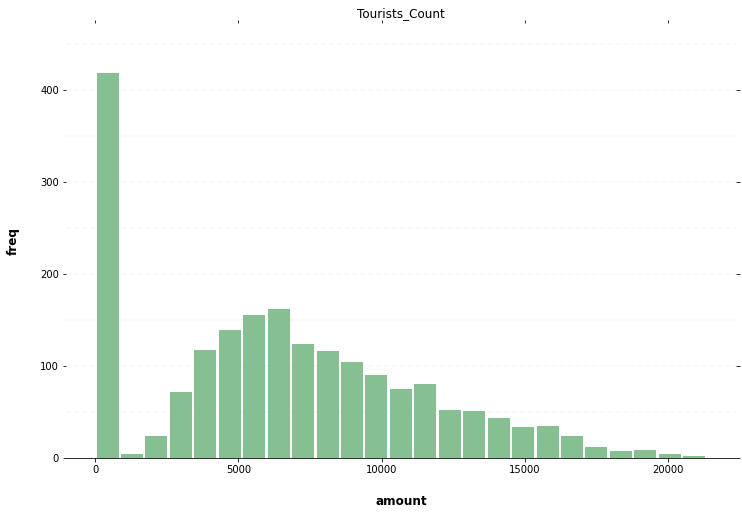

In [9]:
israelis.plot.hist()
tourist.plot.hist()
ax = israelis.hist(column='Israelis_Count', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # # Remove title
    # x.set_title("")
    # # Set x-axis label
    x.set_xlabel("amount", labelpad=20, weight='bold', size=12)
    # # Set y-axis label
    x.set_ylabel("freq", labelpad=20, weight='bold', size=12)
ax1 = tourist.hist(column='Tourists_Count', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax1=ax1[0]
for x in ax1:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # # Remove title
    # x.set_title("")
    # # Set x-axis label
    x.set_xlabel("amount", labelpad=20, weight='bold', size=12)
    # # Set y-axis label
    x.set_ylabel("freq", labelpad=20, weight='bold', size=12)

In [10]:
tourist[tourist.Tourists_Count==0].count()

Tourists_Count    34
dtype: int64

In [24]:
from scipy.stats import kstest, norm
from scipy import stats
my_data = israelis.Israelis_Count
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

my_data = tourist.Tourists_Count
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)


0.9943301944680593 0.0
0.9766101224706764 0.0


In [28]:
stat, p = stats.wilcoxon(tourist.Tourists_Count, israelis.Israelis_Count, zero_method='wilcox',alternative="two-sided")

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=81954.000, p=0.000
Probably different distributions


In [36]:
stat, p = stats.wilcoxon(tourist.Tourists_Count, israelis.Israelis_Count, zero_method='wilcox',alternative="two-sided")

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=81954.000, p=0.000
Probably different distributions


In [38]:
stat, p = stats.wilcoxon(tourist.Tourists_Count, israelis.Israelis_Count, zero_method='wilcox',alternative="less")

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Tourists Count is not less then isrealis')
else:
	print('Tourists Count is less then isrealis')

stat=81954.000, p=0.000
Tourists Count is less then isrealis
